In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [3]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
data = pd.read_csv('../data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
import plotly.express as px

fig = px.histogram(data, x='PRICE')
fig.show()


<AxesSubplot: >

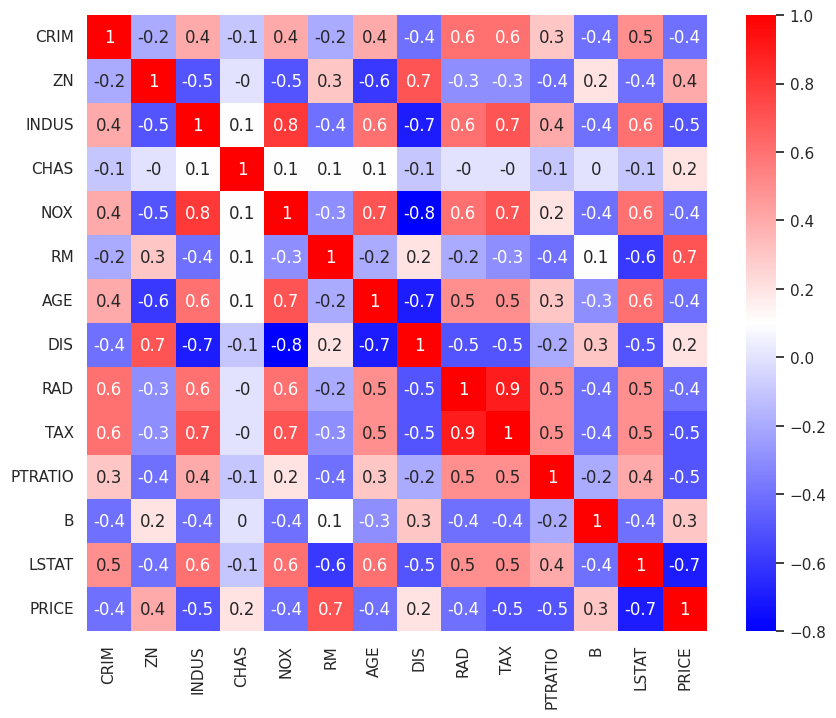

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = data.corr().round(1)

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

<AxesSubplot: xlabel='LSTAT', ylabel='PRICE'>

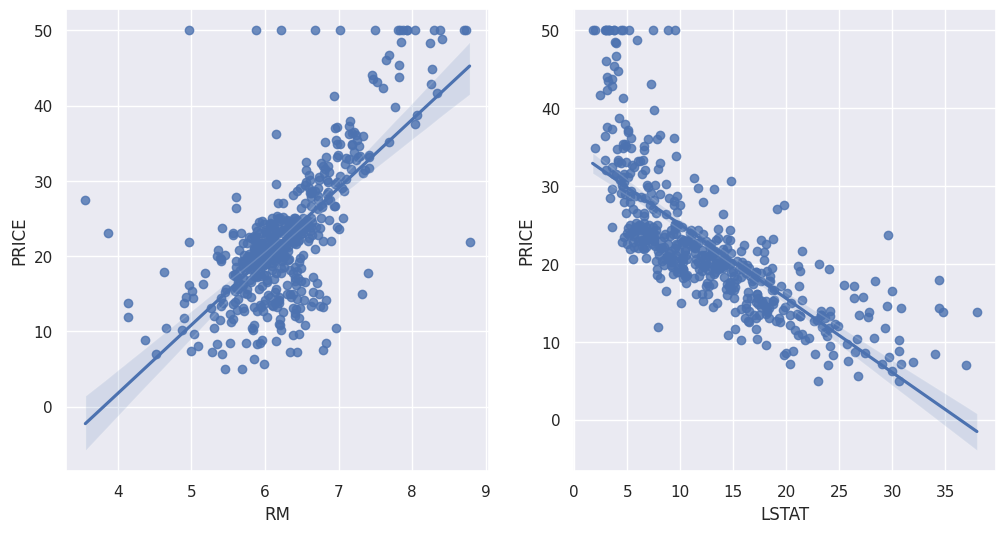

In [6]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=data, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=data, ax=ax[1])

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4.642806069019823
RMSE of Test Data :  4.931352584146701


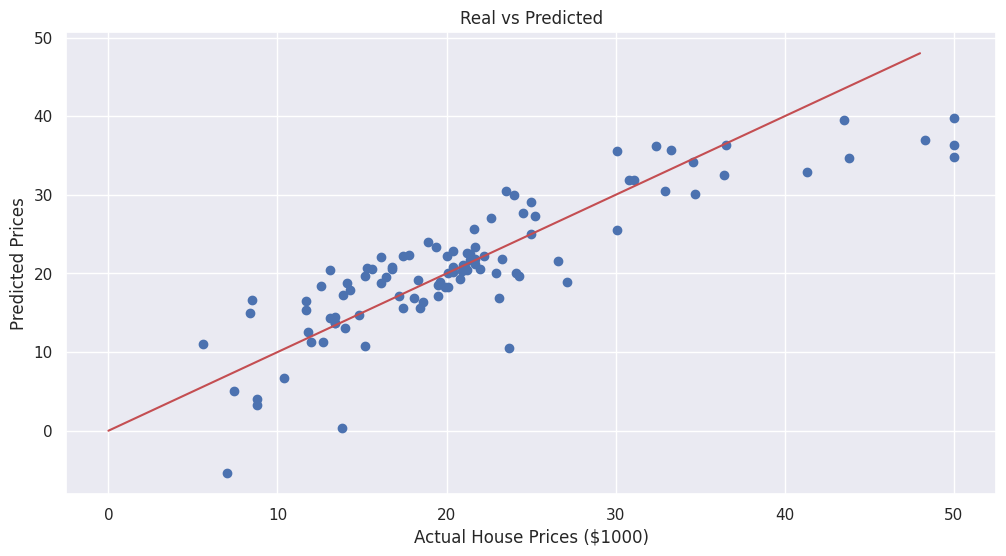

In [10]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()

In [11]:
X = data.drop(['PRICE', 'LSTAT'], axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data :', rmse_tr)
print('RMSE of Test Data :', rmse_test)

RMSE of Train Data : 5.165137874244864
RMSE of Test Data : 5.295595032597169


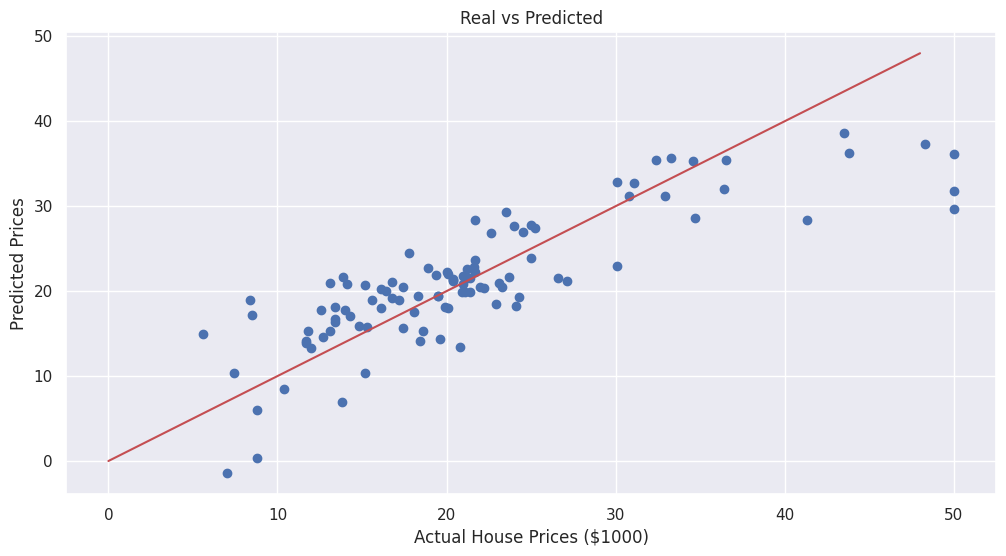

In [13]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()

In [1]:
import pandas as pd

red_dir = '../data/winequality-red.csv'

white_dir = '../data/winequality-white.csv'

red_wine = pd.read_csv(red_dir, sep=';')
white_wine = pd.read_csv(white_dir, sep=';')

In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [6]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [9]:
import plotly.express as px
fig = px.histogram(wine, x="quality", color="color")
fig.show()

In [10]:
X = wine.drop(['color'], axis=1)
y = wine['color']

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3913, 1284]))

In [12]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'], name='Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name='Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [14]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


In [15]:
fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='quality'))

fig.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [19]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_mms_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_mms_pd['quality'], name='quality'))

In [21]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_ss_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_ss_pd['quality'], name='quality'))

fig.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2,
                                                    random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Train Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Train Acc :  0.9569230769230769


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2,
                                                    random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Train Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Train Acc :  0.9569230769230769


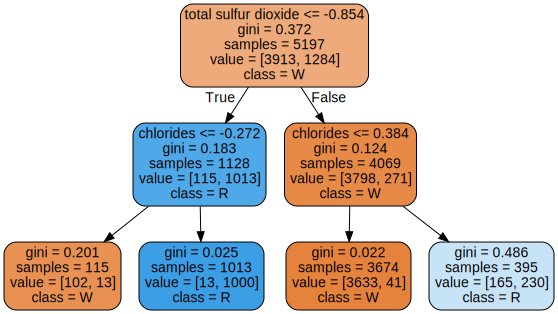

In [24]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(wine_tree, feature_names=X_train.columns,
                       class_names=['W','R'],
                       rounded=True, filled=True))

In [25]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

In [26]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
 13  taste                 6497 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 761.4 KB


In [27]:
X = wine.drop(['taste'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [28]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  1.0
Test Acc :  1.0


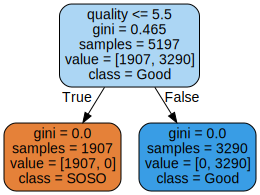

In [29]:
Source(export_graphviz(wine_tree, feature_names=X_train.columns,
                       class_names=['SOSO', 'Good'],
                       rounded=True, filled=True))

In [30]:
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state= 13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [31]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc :', accuracy_score(y_train, y_pred_tr))
print('Test Acc :', accuracy_score(y_test, y_pred_test))

Train Acc : 0.7294593034442948
Test Acc : 0.7161538461538461


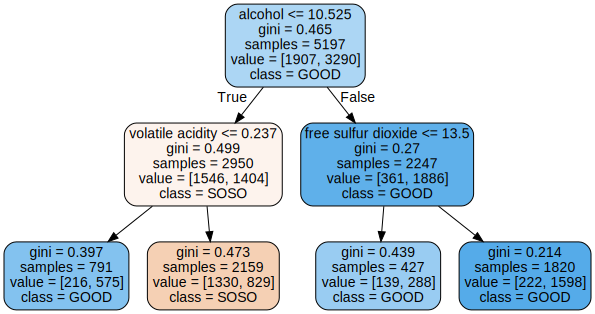

In [32]:
Source(export_graphviz(wine_tree, feature_names=X_train.columns,
                       class_names=['SOSO', 'GOOD'],
                       rounded=True, filled=True))

In [33]:
import pandas as pd

red_dir = '../data/winequality-red.csv'

white_dir = '../data/winequality-white.csv'

red_wine = pd.read_csv(red_dir, sep=';')
white_wine = pd.read_csv(white_dir, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree. predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [35]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

print('Accuray : ', accuracy_score(y_test, y_pred_test))
print('Recall : ', recall_score(y_test, y_pred_test))
print('Precision : ', precision_score(y_test, y_pred_test))
print('AUC Score : ', roc_auc_score(y_test, y_pred_test))
print('F1 Score', f1_score(y_test, y_pred_test))

Accuray :  0.7161538461538461
Recall :  0.7314702308626975
Precision :  0.8026666666666666
AUC Score :  0.7105988470875331
F1 Score 0.7654164017800381


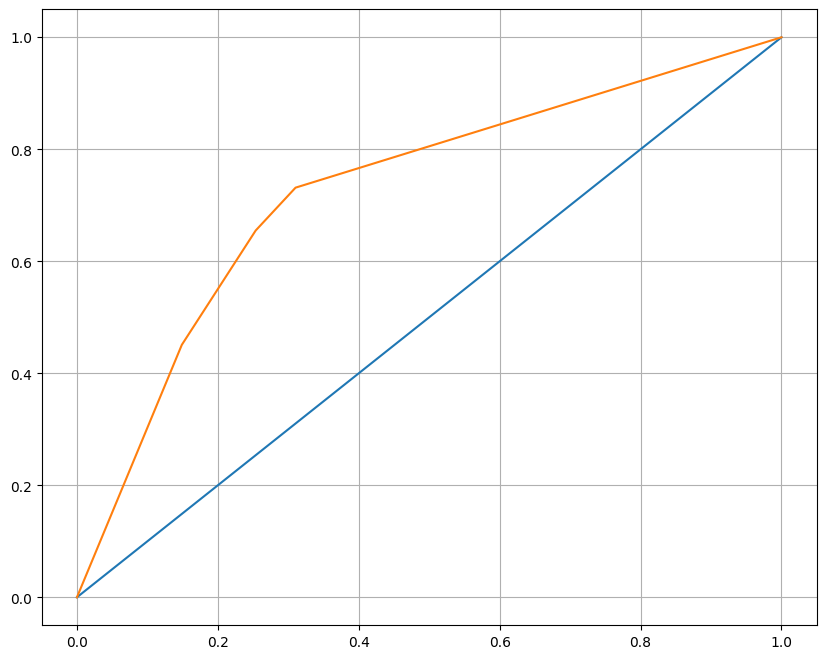

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()

In [37]:
import pandas as pd

red_dir = '../data/winequality-red.csv'

white_dir = '../data/winequality-white.csv'

red_wine = pd.read_csv(red_dir, sep=';')
white_wine = pd.read_csv(white_dir, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis=1)
y = wine['color']

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [40]:
pipe.steps[0]

('scaler', StandardScaler())

In [41]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [42]:
pipe[0]

StandardScaler()

In [43]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13,
                                                    stratify=y)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [47]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc :', accuracy_score(y_train, y_pred_tr))
print('Test Acc :', accuracy_score(y_test, y_pred_test))

Train Acc : 0.9657494708485664
Test Acc : 0.9576923076923077


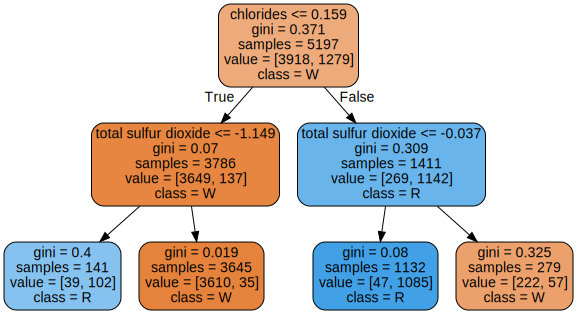

In [48]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(pipe['clf'], feature_names=X.columns,
                       class_names=['W','R'],
                       rounded=True, filled=True))

In [49]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1 / (1+np.exp(-z))

In [82]:
import pandas as pd

wine_dir = '../data/wine.csv'

wine = pd.read_csv(wine_dir, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [83]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 13)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc :', accuracy_score(y_train, y_pred_tr))
print('Test Acc:', accuracy_score(y_test, y_pred_test))

Train Acc : 0.7427361939580527
Test Acc: 0.7438461538461538


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe = Pipeline(estimators)

In [87]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [88]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

In [89]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

models = {'logoistic regression':pipe, 'decision tree':wine_tree}

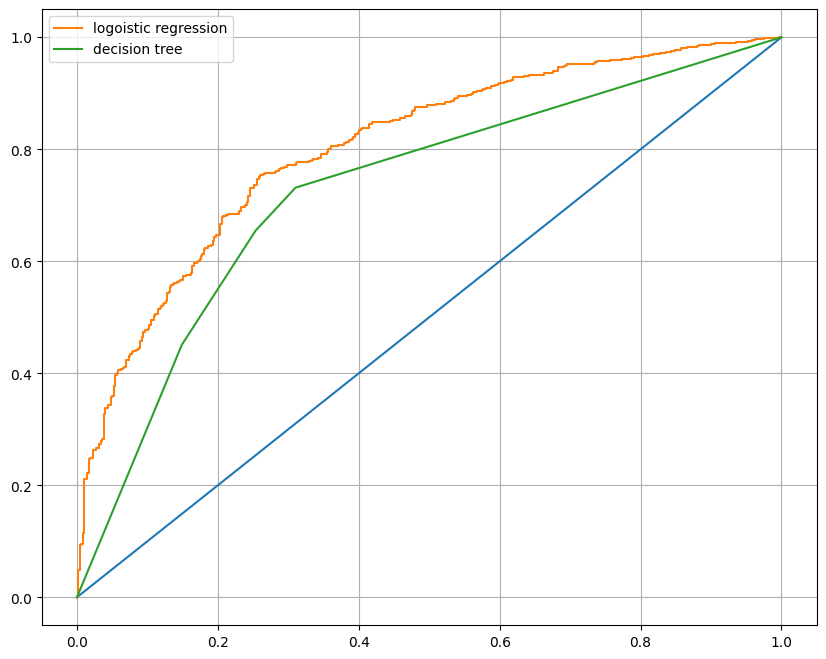

In [90]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1])
for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)

plt.grid()
plt.legend()
plt.show()

In [91]:
import pandas as pd

PIMA_dir = '../data/diabetes.csv'

PIMA = pd.read_csv(PIMA_dir)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


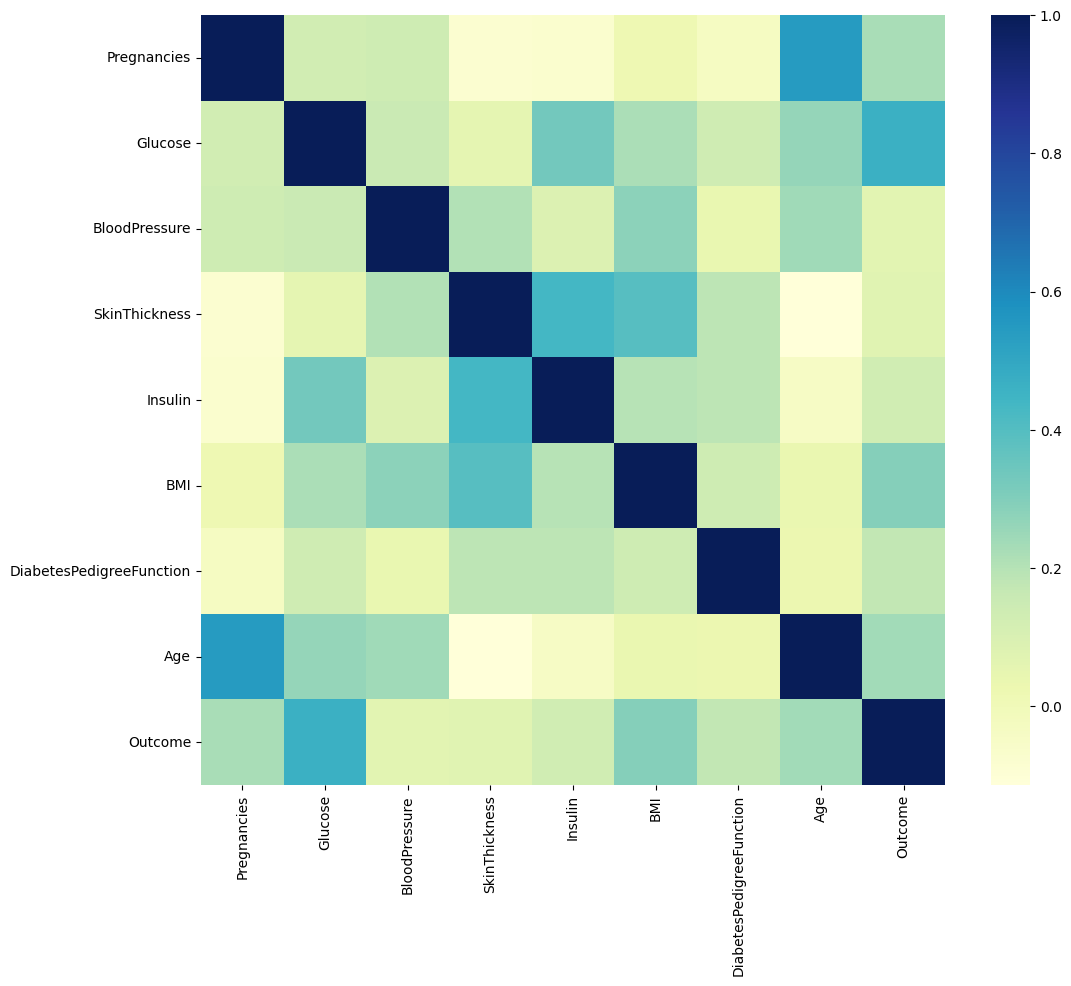

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), cmap="YlGnBu")
plt.show()

In [96]:
(PIMA == 0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [97]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA == 0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [98]:
from sklearn.model_selection import train_test_split

X = PIMA.drop(['Outcome'], axis=1)
y = PIMA['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13, stratify = y)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [101]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC score : ', roc_auc_score(y_test, pred))
print('f1 score : ', f1_score(y_test, pred))

Accuracy :  0.7727272727272727
Recall :  0.6111111111111112
Precision :  0.7021276595744681
AUC score :  0.7355555555555556
f1 score :  0.6534653465346535


In [102]:
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [103]:
coeff

[0.3542658884412648,
 1.2014244425037581,
 -0.15840135536286715,
 0.03394657712929963,
 -0.16286471953988135,
 0.620404521989511,
 0.3666935579557874,
 0.1719596544703511]

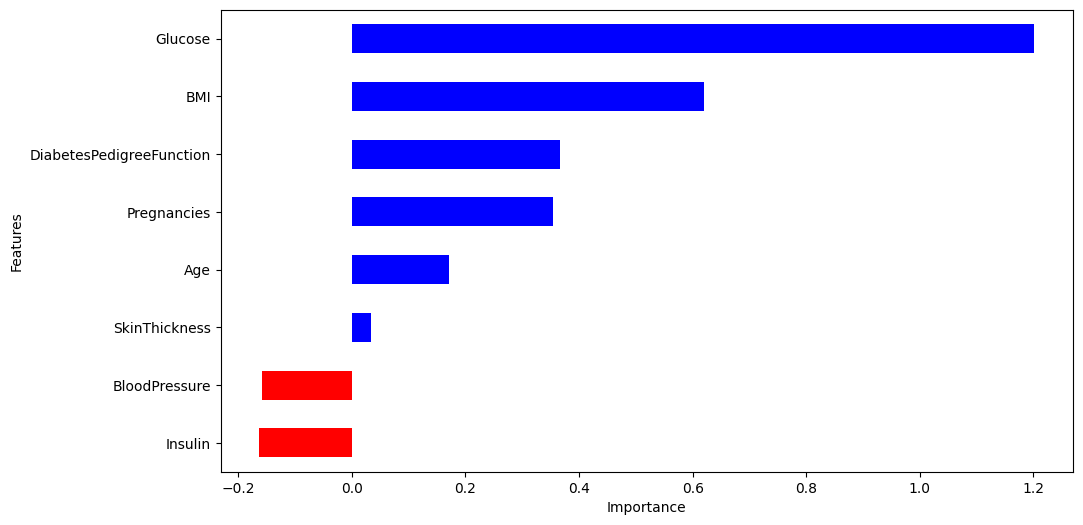

In [104]:
features = pd.DataFrame({'Features':labels, 'importance':coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh',
                            figsize=(11,6),
                            color=features['positive'].map({True:'blue', False:'red'}))

plt.xlabel('Importance')
plt.show()

In [107]:
import pandas as pd

red_dir = '../data/winequality-red.csv'

white_dir = '../data/winequality-white.csv'

red_wine = pd.read_csv(red_dir, sep=';')
white_wine = pd.read_csv(white_dir, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state = 13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [110]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

In [111]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [113]:
cv_accuracy = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

In [114]:
np.mean(cv_accuracy)

0.709578255462782

In [115]:
cv_accuracy = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

In [116]:
cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [122]:
np.mean(cv_accuracy)

1.0

In [121]:
from sklearn.model_selection import StratifiedGroupKFold

skfold = StratifiedGroupKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accuracy = []

for train_idx, test_idx in skfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy

ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required by DecisionTreeClassifier.